The aim of this projet was to segment the tumor automatically. To so so, i have implemented a code which use the watershed method.


First of all, to apply the watershed method, we need to apply a gradient on a 1-channel image. We have a 3-channel image at the begining so I chose to convert the image to grayscale and then compute the gradient
on it. The result of this technic is less noisy than take the gradient of each channel and combine them by a sum. We can see the result in the cell below.

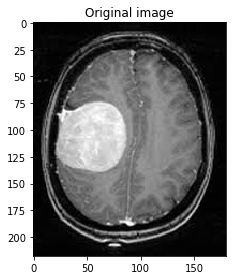

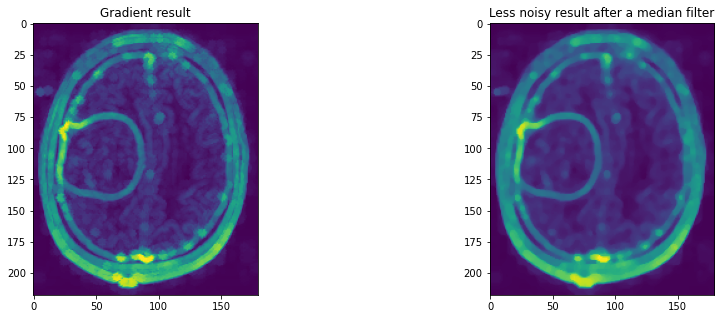

In [40]:
%matplotlib inline
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
import skimage.filters.rank as skr
from skimage.morphology import disk

im = imread('mri_brain.jpg')
plt.title('Original image')
imshow(im)


grad_gray = skr.gradient(rgb2gray(im), disk(3)) #apply the gradient to the converted grayscale image.

#The result is a bit noisy so I apply a median filter to the image to minimise the noise.
gradient = skr.median(grad_gray,disk(3))


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Gradient result')
plt.imshow(grad_gray)
plt.subplot(1,2,2)
plt.title('Less noisy result after a median filter')
plt.imshow(gradient)
plt.show()


Now that we have apply the gradient, we can select markers that will be used to the watershed method. The idea is to automatically find the tumor so I chose to find the markers automatically
with the local minima of the gradient image. We can see the result in the cell below.

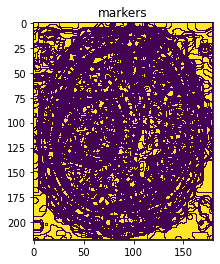

In [41]:
from skimage.feature import peak_local_max

gradient_i = gradient.max()-gradient # inverse gradient image 
markers = peak_local_max(gradient_i, indices=False)
plt.figure()
plt.title('markers')
plt.imshow(markers)
plt.show()

We see that with this technic, we obtain a lot of markers, so the result would be an iversegmentation -> we need to reduce the number of markers. To do so, i have used the parameters of "peak_local_max".
I have proceed by trial and error to find some good parameters that reduce enough the number of markers. We can see the result below.

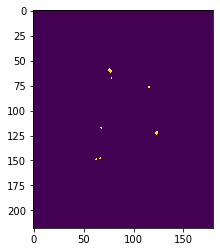

In [45]:
markers = peak_local_max(gradient_i, indices=False, threshold_rel=0.1, min_distance=25)
plt.figure()
plt.imshow(markers)
plt.show()

It's working, we have less markers. Now we can use this markers to apply the watershed method. I gave a number to each markers with the label method and then I have applied the watershed method.

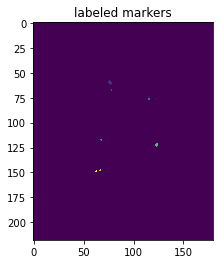

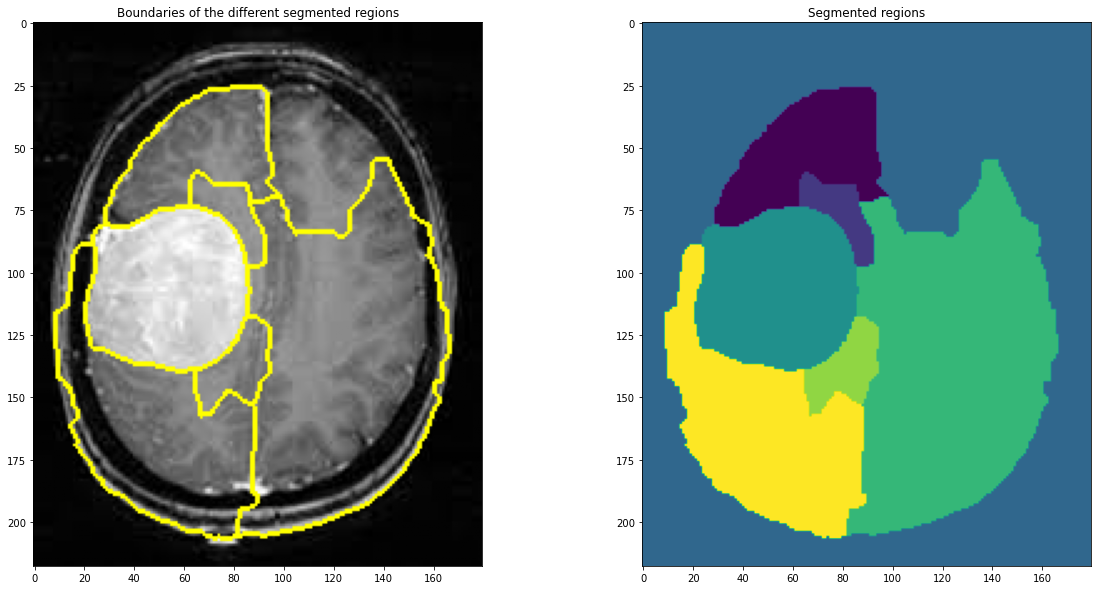

In [43]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.measure import label

markers = label(peak_local_max(gradient_i, indices=False, threshold_rel=0.1, min_distance=25)) #give a number to each markers
plt.figure()
plt.title('labeled markers')
plt.imshow(markers)
plt.show()

ws = watershed(gradient, markers) #apply the wathershed method

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Boundaries of the different segmented regions')
plt.imshow(mark_boundaries(im,ws))
plt.subplot(1,2,2)
plt.title('Segmented regions')
plt.imshow(ws)
plt.show()



We see that it's working : the tumor is perfectly segmented.

The second step of the project is to estimate the area of the tumor. To do so, i have used the regionprops from skimage.

centroid coord (106.68586088939567, 53.80273660205245)
region area 3508 pixels


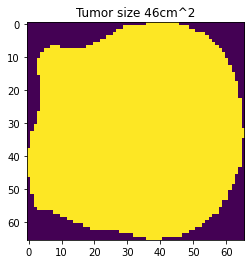

In [44]:
from skimage.measure import label, regionprops

labels = label(ws) #to label the watershed result
regions = regionprops(labels) # Using the watershed result to compute the regions


print('centroid coord', regions[4].centroid) #to check if i'm looking at the good region
print('region area', regions[4].area, 'pixels') #print the area of the region = the number of pixel of the region


plt.figure()
plt.title('Tumor size 46cm^2')
plt.imshow(regions[4].image)
plt.show()